In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1= pd.read_excel('crime_datas_from20to22.xlsx');
df2=pd.read_excel('gender_wise_crime_analysis_22.xlsx');

In [36]:
df1.columns

Index(['States', 2020, 2021, 2022], dtype='object')

In [3]:
df1.sample(5)

,States,2020,2021,2022
19,Punjab,1399,1787,1654
5,Goa,45,52,84
13,Maharashtra,8103,10502,12260
7,Haryana,2949,3554,3891
23,Telangana,2056,2760,2981


In [4]:
df2.sample(5)

,States,Below_6 _Years_M,Below_6 _Years_F,Below_6 _Years_T,6 to12 Years_M,6 to12 Years_F,6 to12 Years_T,12to16_Years_M,12to16_Years_F,12to16_Years_T,...,30to60_Years_M,30to60_Years_F,30to60_Years_T,60_Years_above_M,60_Years_above_F,60_Years_above_T,Total_victims_M,Total_victims_F,Total_victims,Charging_rate
25,Uttar Pradesh,43,12,55,175,215,390,433,2941,3374,...,169,1662,1831,10,73,83,1500,14960,16460,43.7
10,Karnataka,26,16,42,76,58,134,432,833,1265,...,130,31,161,6,2,8,1109,2386,3495,9.3
11,Kerala,7,2,9,20,13,33,29,94,123,...,43,3,46,4,1,5,159,250,409,93.7
21,Sikkim,0,0,0,2,2,4,15,25,40,...,0,0,0,0,0,0,19,42,61,11.7
26,Uttarakhand,5,8,13,42,20,62,72,102,174,...,119,282,401,6,6,12,407,778,1185,14.8


In [5]:
df2.columns

Index(['States', 'Below_6 _Years_M', 'Below_6 _Years_F', 'Below_6 _Years_T',
       '6 to12 Years_M', '6 to12 Years_F', '6 to12 Years_T', '12to16_Years_M',
       '12to16_Years_F', '12to16_Years_T', '16to18_Years_M', '16to18_Years_F',
       '16to18_Years_T', '18to30Years_M', '18to30Years_F', '18to30Years_T',
       '30to60_Years_M', '30to60_Years_F', '30to60_Years_T',
       '60_Years_above_M', '60_Years_above_F', '60_Years_above_T',
       'Total_victims_M', 'Total_victims_F', 'Total_victims', 'Charging_rate'],
      dtype='object')

In [6]:
df1.columns

Index(['States', 2020, 2021, 2022], dtype='object')

### convert df1 from  Wide Format to Long Format

In [7]:
df_years_long = df1.melt(id_vars='States', 
                         value_vars=[2020, 2021, 2022],
                         var_name='Year', 
                         value_name='Total_Crimes')


##  Crimes per State Across Years

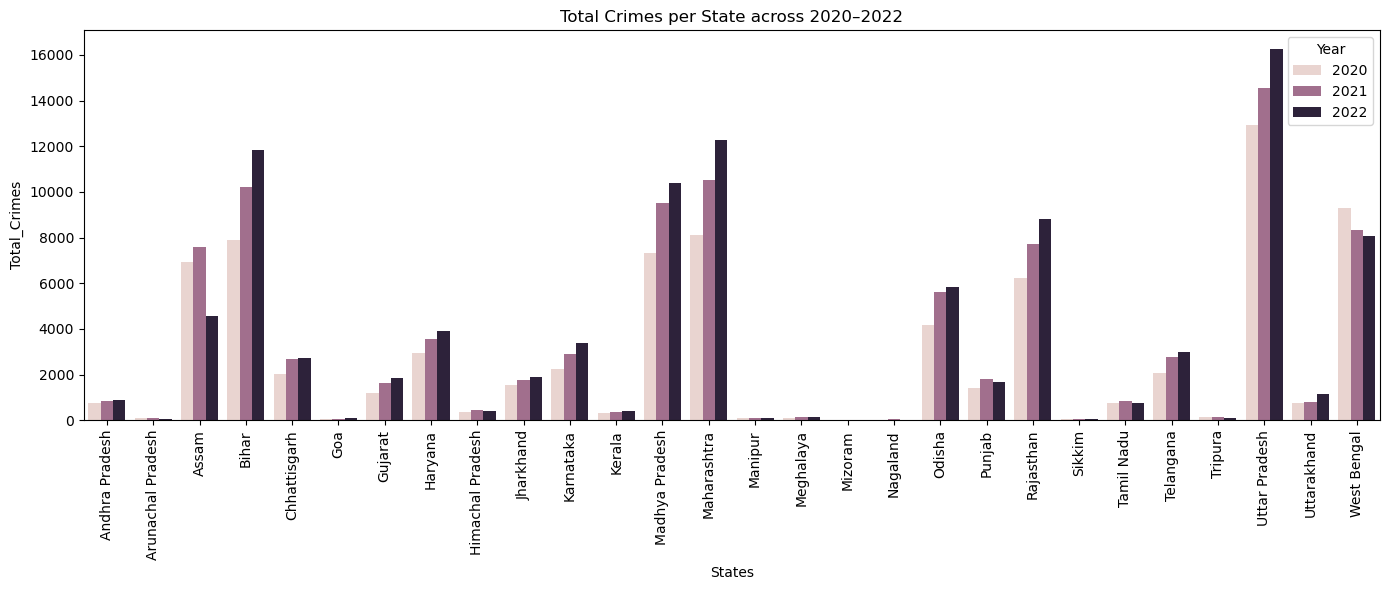

In [8]:
plt.figure(figsize=(14, 6))
sns.barplot(data=df_years_long, x='States', y='Total_Crimes', hue='Year')
plt.xticks(rotation=90)
plt.title("Total Crimes per State across 2020–2022")
plt.tight_layout()
plt.show()

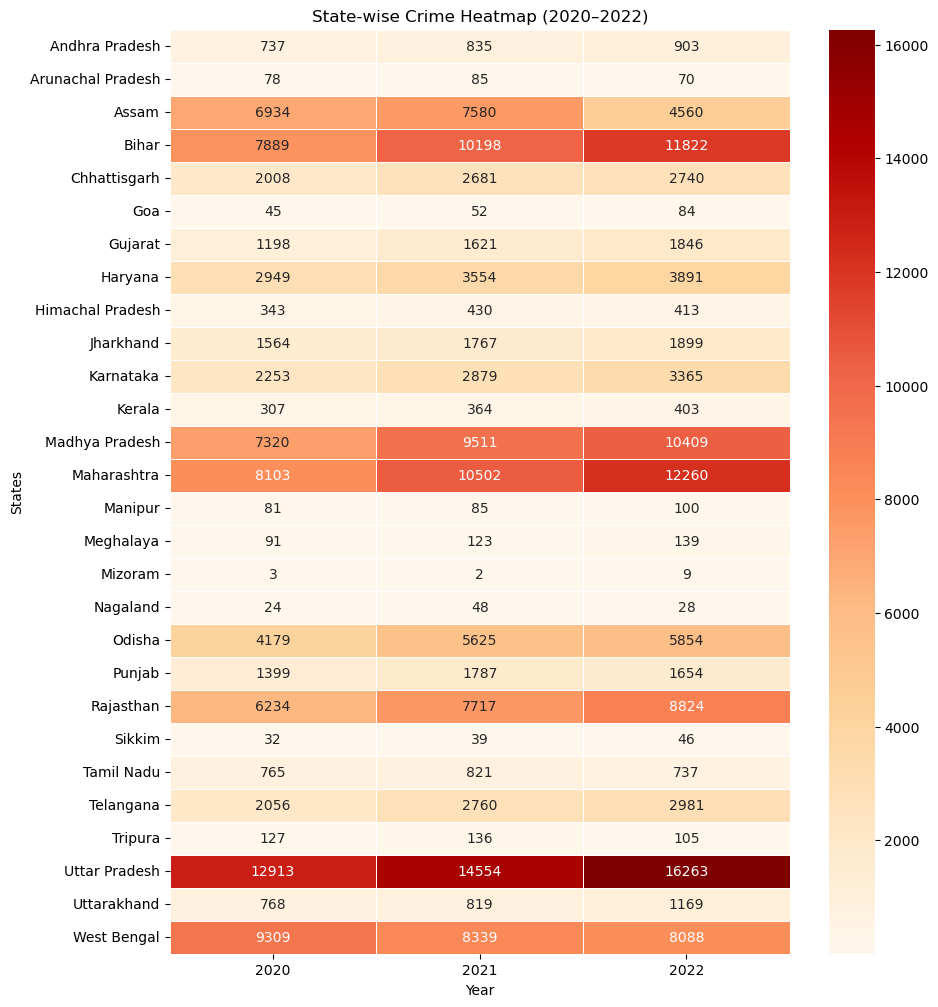

In [12]:

# Pivot for heatmap
df_pivot = df_years_long.pivot(index='States', columns='Year', values='Total_Crimes')

plt.figure(figsize=(10, 12))
sns.heatmap(df_pivot, annot=True, fmt='.0f', cmap='OrRd', linewidths=.5)
plt.title("State-wise Crime Heatmap (2020–2022)")
plt.show()


In [13]:
# State-wise total population in Crores (2022 estimated)
population_crore = {
    'Uttar Pradesh': 24.1,
    'Maharashtra': 12.6,
    'Bihar': 12.7,
    'West Bengal': 10.2,
    'Madhya Pradesh': 8.8,
    'Rajasthan': 8.2,
    'Tamil Nadu': 7.9,
    'Karnataka': 7.1,
    'Gujarat': 7.3,
    'Andhra Pradesh': 5.3,
    'Odisha': 4.7,
    'Telangana': 4.3,
    'Kerala': 3.5,
    'Jharkhand': 4.0,
    'Assam': 3.6,
    'Punjab': 3.1,
    'Chhattisgarh': 3.0,
    'Haryana': 2.9,
    'Delhi': 2.1,
    'Jammu & Kashmir': 1.5,
    'Uttarakhand': 1.2,
    'Himachal Pradesh': 0.8,
    'Tripura': 0.45,
    'Meghalaya': 0.42,
    'Manipur': 0.38,
    'Nagaland': 0.24,
    'Goa': 0.18,
    'Arunachal Pradesh': 0.17,
    'Mizoram': 0.13,
    'Sikkim': 0.07
}


In [14]:
df2['Population_Crore'] = df2['States'].map(population_crore)


In [15]:
df2['Victims_per_1L'] = (df2['Total_victims'] / (df2['Population_Crore'] * 100000))


In [16]:
df_sorted = df2.sort_values(by='Victims_per_1L', ascending=False)

## Crimes per state per lakh

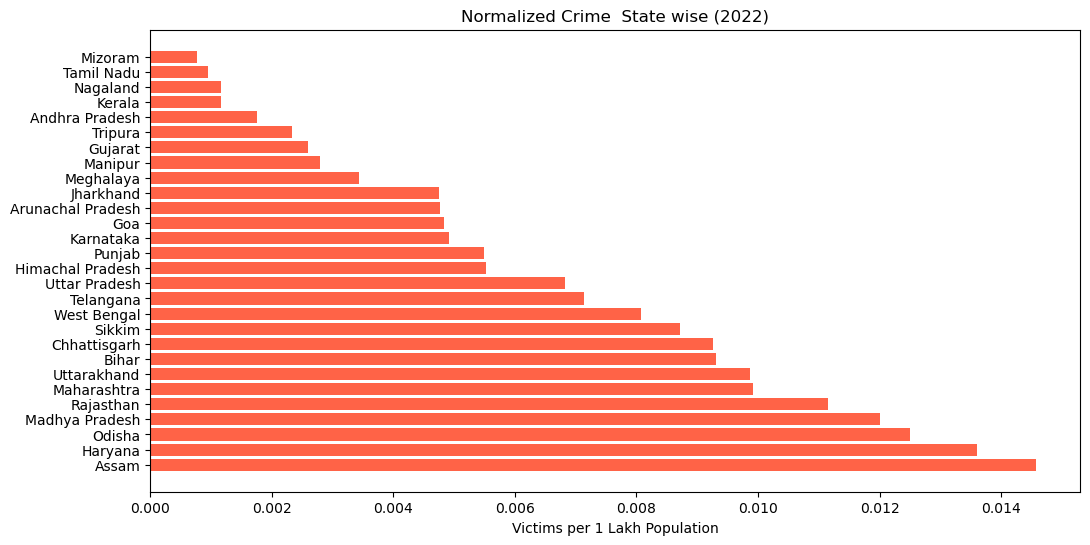

In [17]:

plt.figure(figsize=(12, 6))
plt.barh(df_sorted['States'], df_sorted['Victims_per_1L'], color='tomato')
plt.xlabel("Victims per 1 Lakh Population")
plt.title("Normalized Crime  State wise (2022)")
plt.show()


In [18]:
df2['Victims_per_1L_M'] = df2['Total_victims_M'] / (df2['Population_Crore'] * 100000)
df2['Victims_per_1L_F'] = df2['Total_victims_F'] / (df2['Population_Crore'] * 100000)


In [19]:
#pandas.melt() to reshape your DataFrame from wide format to long format 
df_long = df2[['States', 'Victims_per_1L_F', 'Victims_per_1L_M']].melt(
    id_vars='States',
    value_vars=['Victims_per_1L_F', 'Victims_per_1L_M'],
    var_name='Gender',
    value_name='Victims_per_1L'
)

# Optional: clean gender names
df_long['Gender'] = df_long['Gender'].map({
    'Victims_per_1L_F': 'Female',
    'Victims_per_1L_M': 'Male'
})




### Gender wise crime per state 

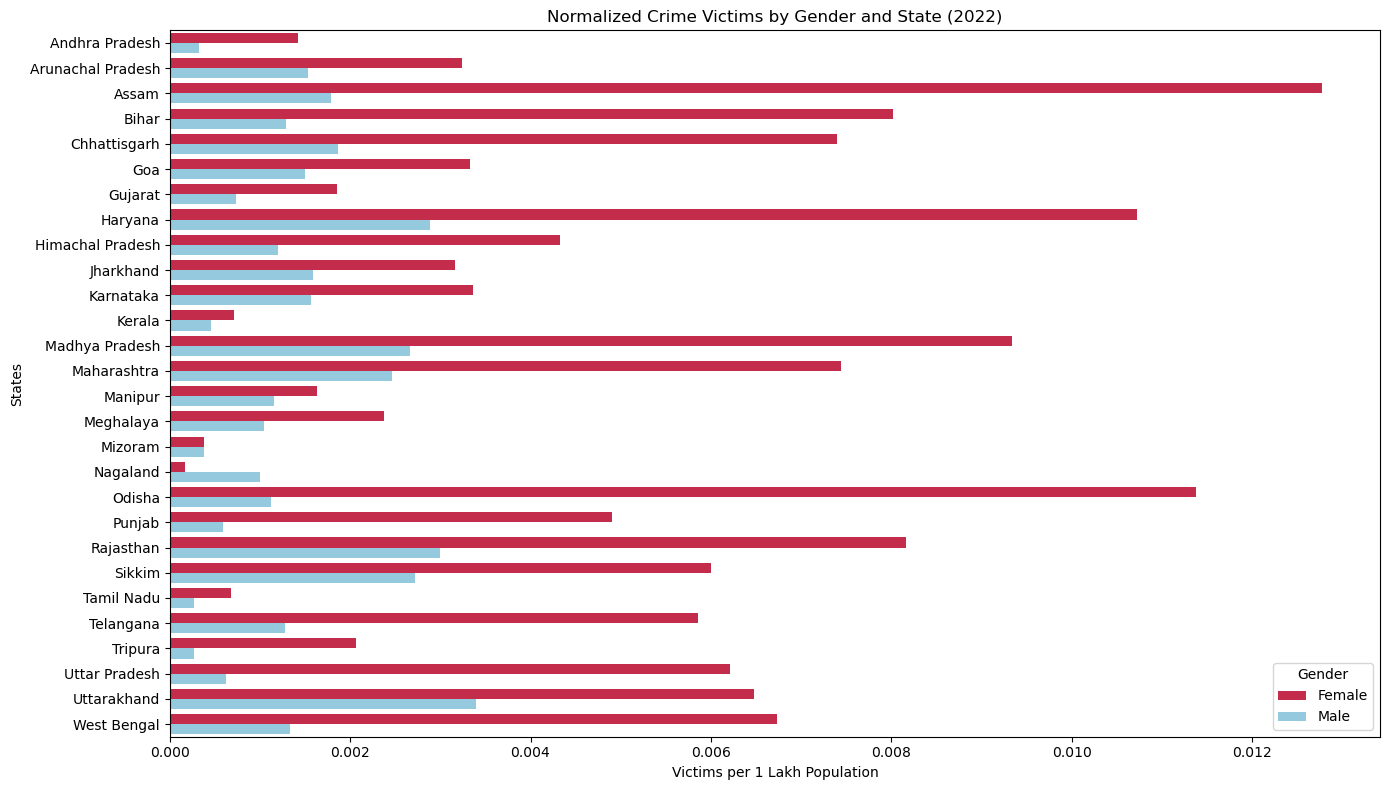

In [20]:
plt.figure(figsize=(14, 8))
sns.barplot(data=df_long, y='States', x='Victims_per_1L', hue='Gender', palette=['crimson', 'skyblue'])
plt.title("Normalized Crime Victims by Gender and State (2022)")
plt.xlabel("Victims per 1 Lakh Population")
plt.tight_layout()
plt.show()

In [21]:
df_long

,States,Gender,Victims_per_1L
0,Andhra Pradesh,Female,0.001426
1,Arunachal Pradesh,Female,0.003235
2,Assam,Female,0.012781
3,Bihar,Female,0.008024
4,Chhattisgarh,Female,0.007393
5,Goa,Female,0.003333
6,Gujarat,Female,0.001855
7,Haryana,Female,0.010721
8,Himachal Pradesh,Female,0.004325
9,Jharkhand,Female,0.003162


### Pivot the Data

In [22]:
heatmap_data = df_long.pivot(index='States', columns='Gender', values='Victims_per_1L')
heatmap_data 

Gender,Female,Male
States,,
Andhra Pradesh,0.001426,0.000323
Arunachal Pradesh,0.003235,0.001529
Assam,0.012781,0.001792
Bihar,0.008024,0.001285
Chhattisgarh,0.007393,0.001863
Goa,0.003333,0.001500
Gujarat,0.001855,0.000736
Haryana,0.010721,0.002883
Himachal Pradesh,0.004325,0.001200


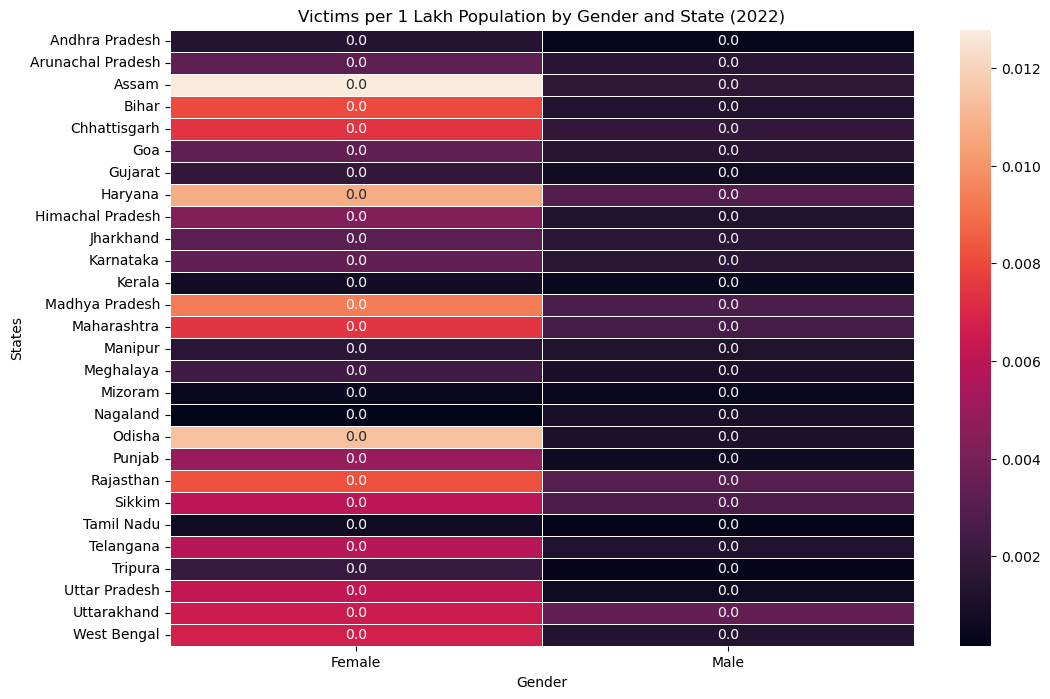

In [23]:
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.1f', linewidths=0.5)
plt.title("Victims per 1 Lakh Population by Gender and State (2022)")
plt.xlabel("Gender")
plt.ylabel("States")
plt.show()


In [35]:
df2.columns

Index(['States', 'Below_6 _Years_M', 'Below_6 _Years_F', 'Below_6 _Years_T',
       '6 to12 Years_M', '6 to12 Years_F', '6 to12 Years_T', '12to16_Years_M',
       '12to16_Years_F', '12to16_Years_T', '16to18_Years_M', '16to18_Years_F',
       '16to18_Years_T', '18to30Years_M', '18to30Years_F', '18to30Years_T',
       '30to60_Years_M', '30to60_Years_F', '30to60_Years_T',
       '60_Years_above_M', '60_Years_above_F', '60_Years_above_T',
       'Total_victims_M', 'Total_victims_F', 'Total_victims', 'Charging_rate',
       'Population_Crore', 'Victims_per_1L', 'Victims_per_1L_M',
       'Victims_per_1L_F'],
      dtype='object')

# Crime against women

In [24]:
df_women=pd.read_excel('crime_against_women.xlsx')

In [25]:
df_women.columns

Index(['States', 'Murder with Rape/Gang Rape', 'Dowry Deaths',
       'Abetment to Suicide of Women ', 'Miscarriage', 'Acid Attack',
       'Cruelty by Husband or his relatives ',
       'Kidnapping & Abduction of Women (Total)',
       'Procuration of Minor Girls ', 'women Trafficking',
       'Selling of Minor Girls', 'Rape_cases',
       'Assault on Women with Intent to Outrage her Modesty ',
       'Insult to the Modesty of Women', 'Dowry_prohibition',
       ' Procuring, inducing Children\nfor the sake of prostitution',
       'Publishing or Transmitting of Sexually Explicit Material ',
       'Women Centric Cyber Crimes (Ex. Blackmailing/ Defamation/Morphing/ Fake Profile)'],
      dtype='object')

In [26]:
df_women.columns = df_women.columns.str.strip().str.replace("\n", " ").str.replace(" ", "_")


In [27]:
df_women.head()


,States,Murder_with_Rape/Gang_Rape,Dowry_Deaths,Abetment_to_Suicide_of_Women,Miscarriage,Acid_Attack,Cruelty_by_Husband_or_his_relatives,Kidnapping_&_Abduction_of_Women_(Total),Procuration_of_Minor_Girls,women_Trafficking,Selling_of_Minor_Girls,Rape_cases,Assault_on_Women_with_Intent_to_Outrage_her_Modesty,Insult_to_the_Modesty_of_Women,Dowry_prohibition,"Procuring,_inducing_Children_for_the_sake_of_prostitution",Publishing_or_Transmitting_of_Sexually_Explicit_Material,Women_Centric_Cyber_Crimes_(Ex._Blackmailing/_Defamation/Morphing/_Fake_Profile)
0,Andhra Pradesh,8,100,358,4,3,11964,592,55,32,0,621,5884,3145,298,40,89,19
1,Arunachal Pradesh,0,0,0,0,0,74,48,0,1,0,74,67,20,0,0,1,0
2,Assam,14,175,75,2,3,4704,3466,285,55,3,1113,1984,149,272,4,101,51
3,Bihar,0,1057,2,0,3,1850,10190,0,25,0,881,402,0,3580,36,4,13
4,Chhattisgarh,7,57,149,5,0,942,2121,0,12,0,1246,1322,255,9,0,200,3


In [28]:
df_women.columns


Index(['States', 'Murder_with_Rape/Gang_Rape', 'Dowry_Deaths',
       'Abetment_to_Suicide_of_Women', 'Miscarriage', 'Acid_Attack',
       'Cruelty_by_Husband_or_his_relatives',
       'Kidnapping_&_Abduction_of_Women_(Total)', 'Procuration_of_Minor_Girls',
       'women_Trafficking', 'Selling_of_Minor_Girls', 'Rape_cases',
       'Assault_on_Women_with_Intent_to_Outrage_her_Modesty',
       'Insult_to_the_Modesty_of_Women', 'Dowry_prohibition',
       'Procuring,_inducing_Children_for_the_sake_of_prostitution',
       'Publishing_or_Transmitting_of_Sexually_Explicit_Material',
       'Women_Centric_Cyber_Crimes_(Ex._Blackmailing/_Defamation/Morphing/_Fake_Profile)'],
      dtype='object')

## Top 10 States by Each Crime Type

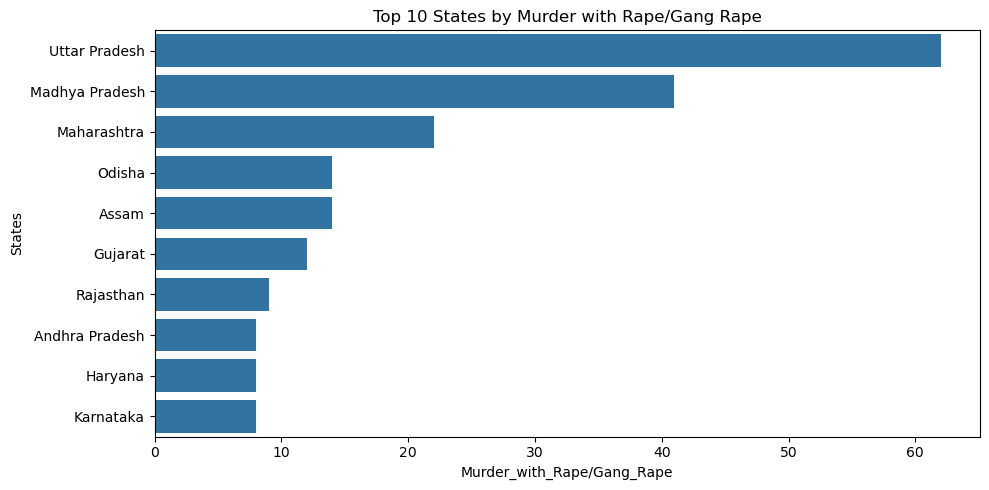

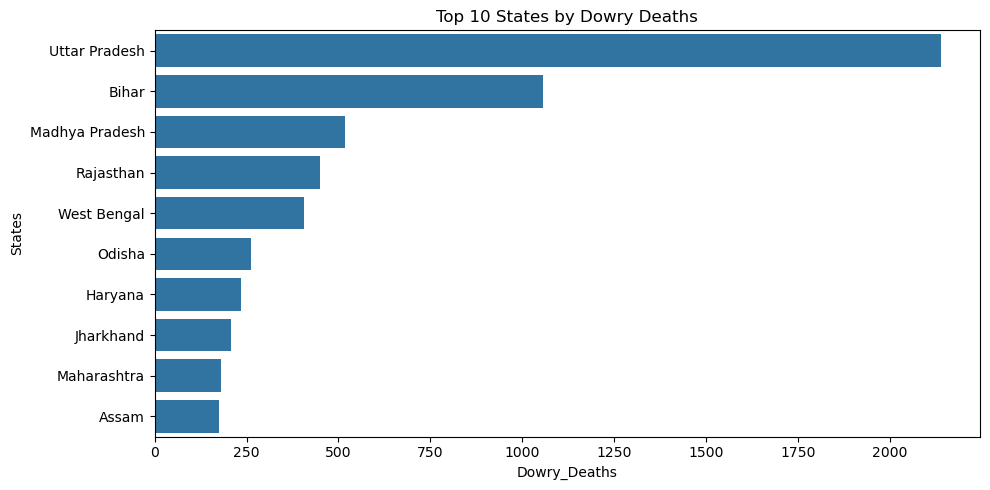

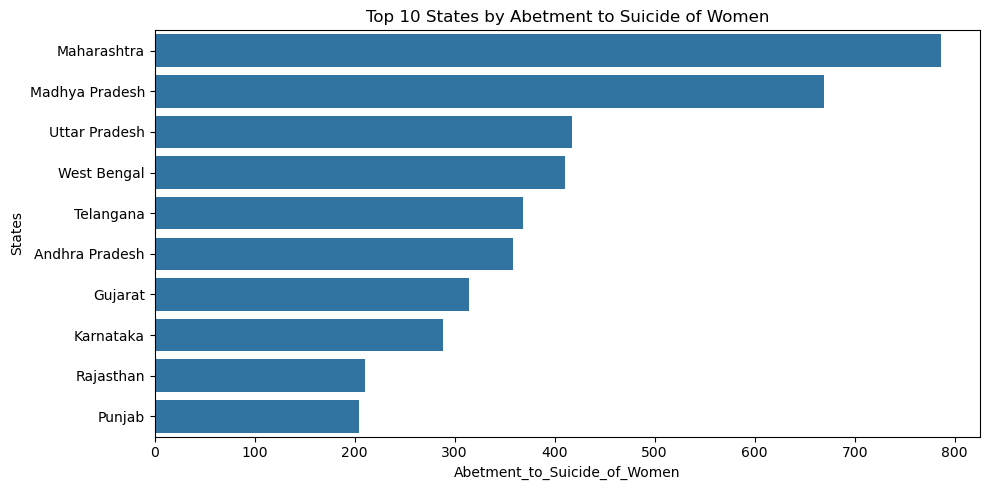

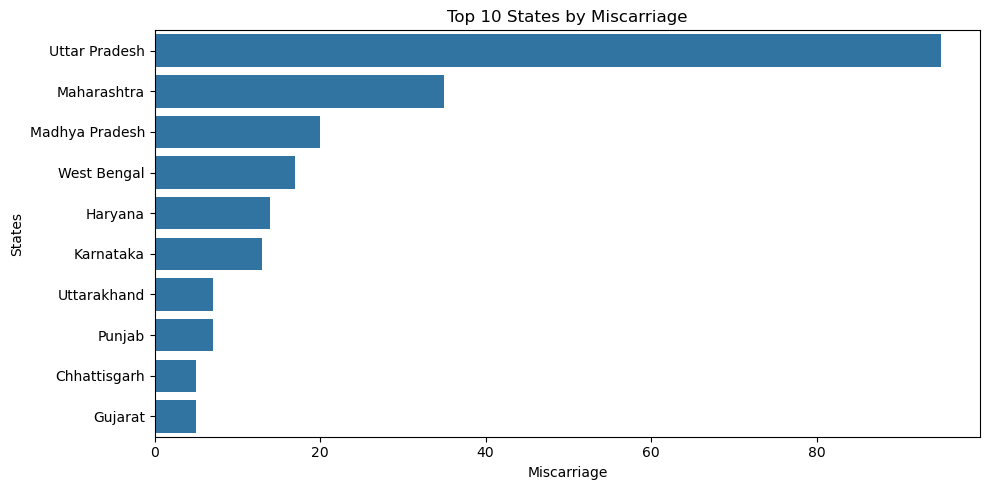

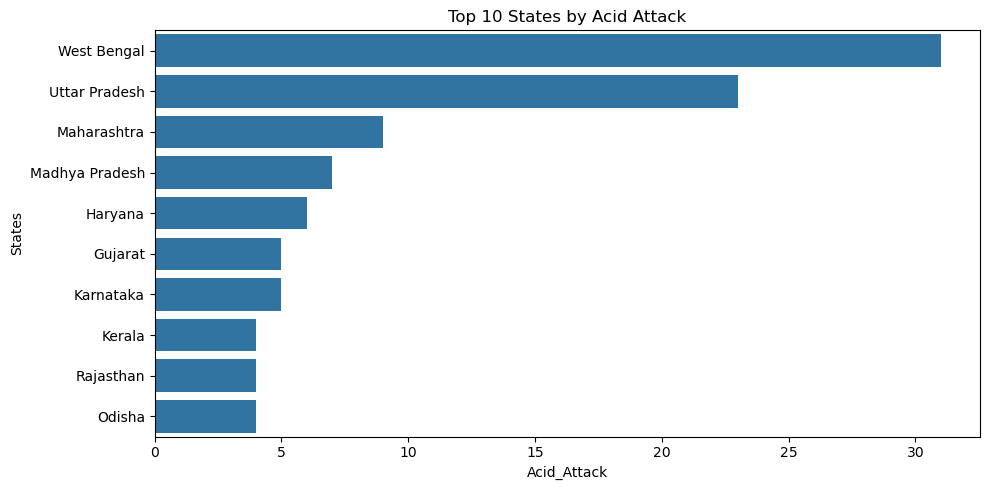

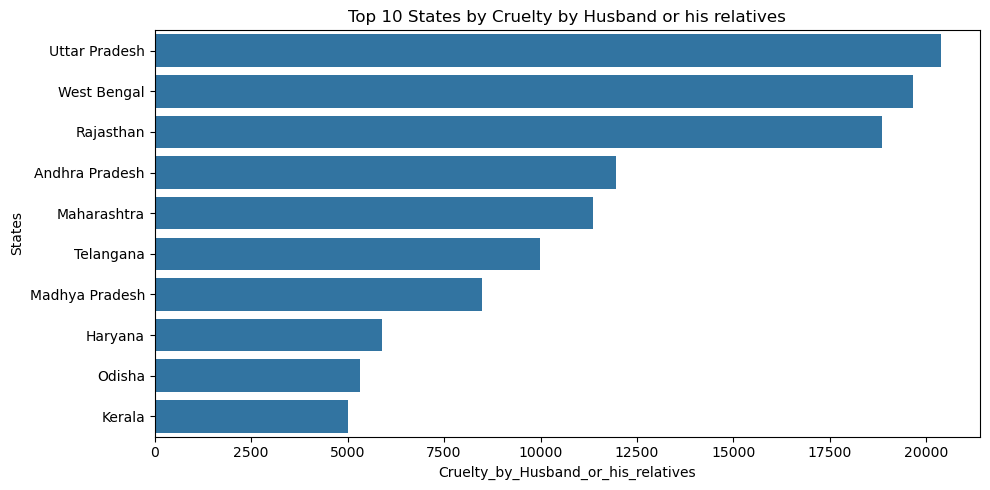

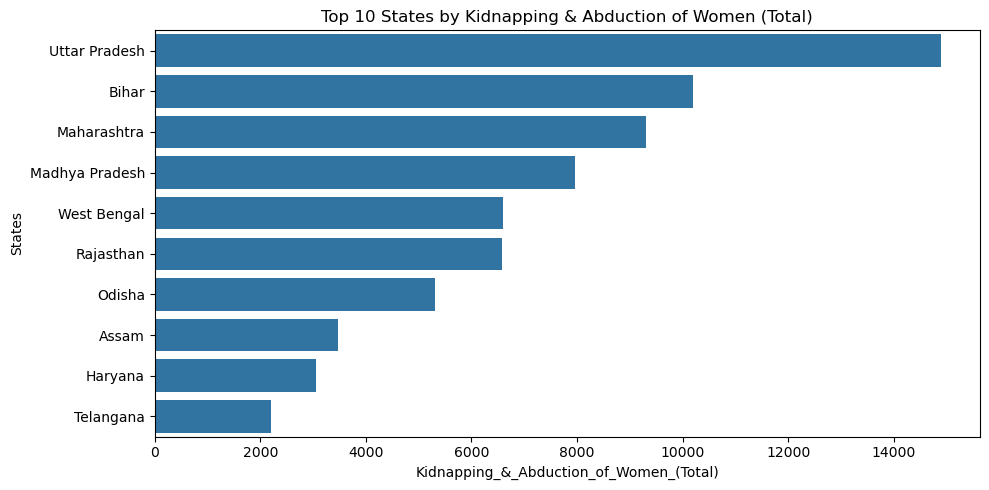

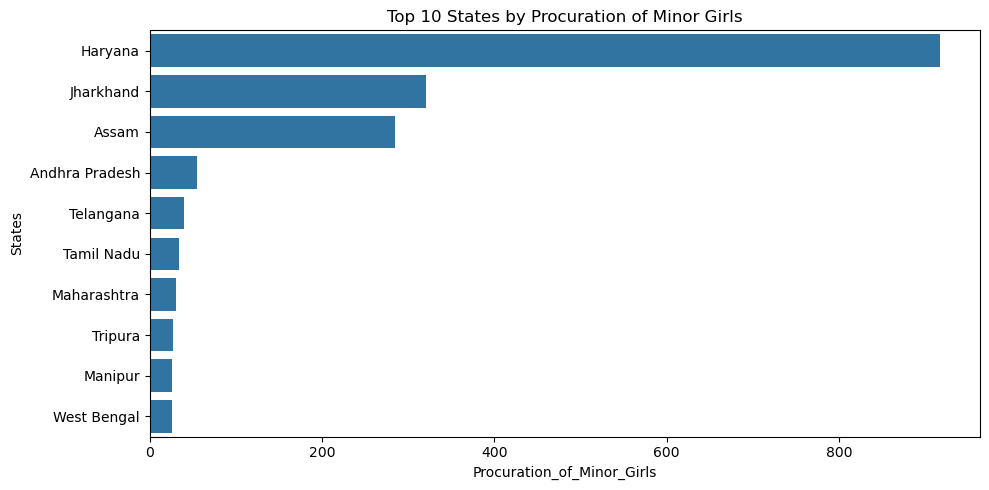

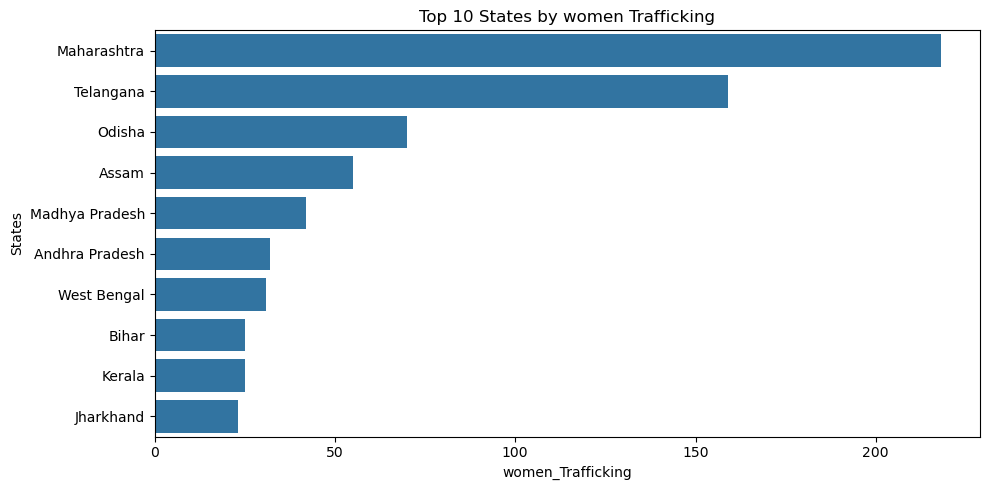

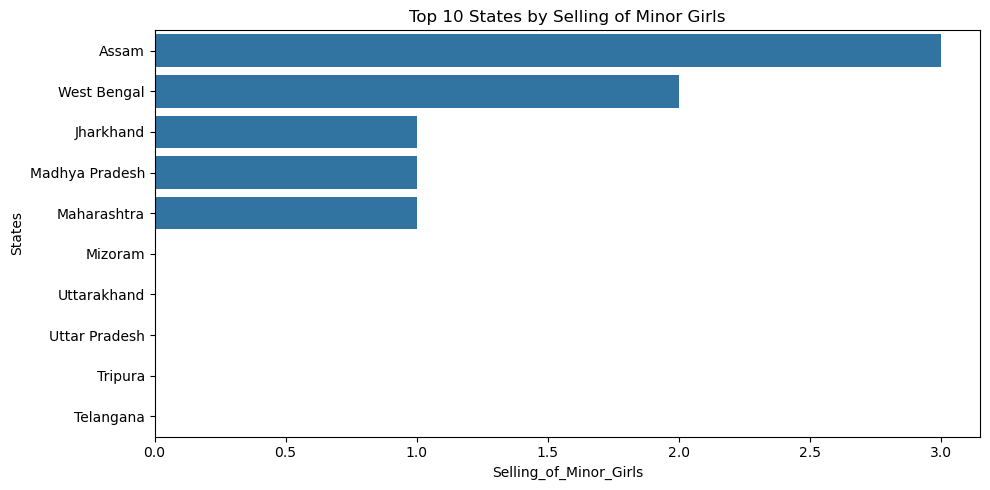

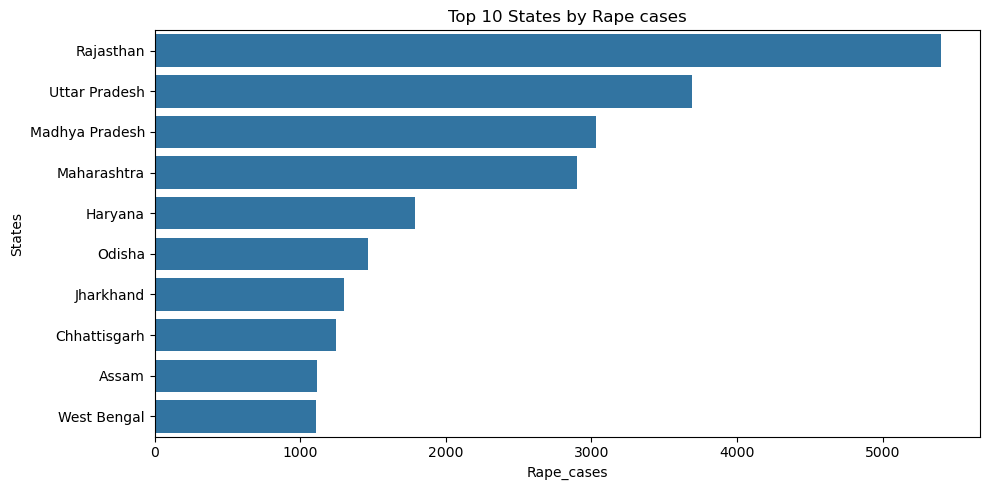

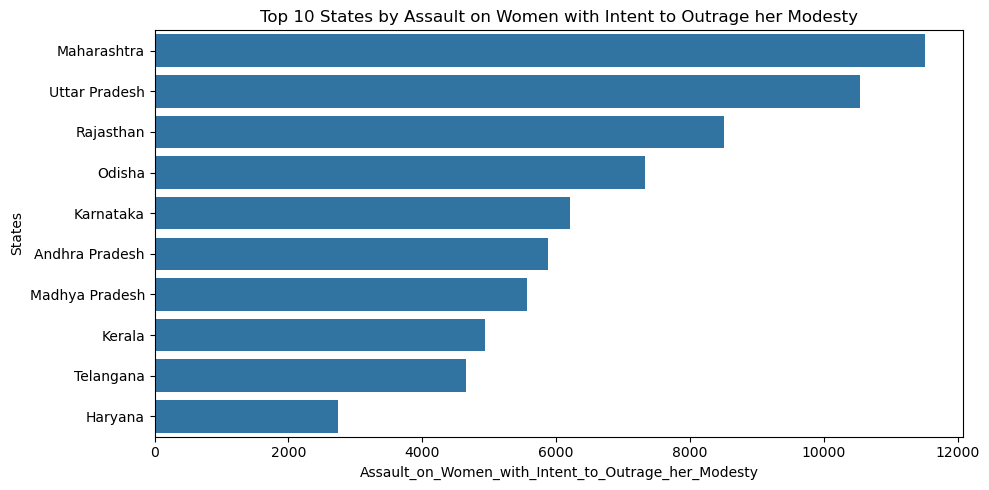

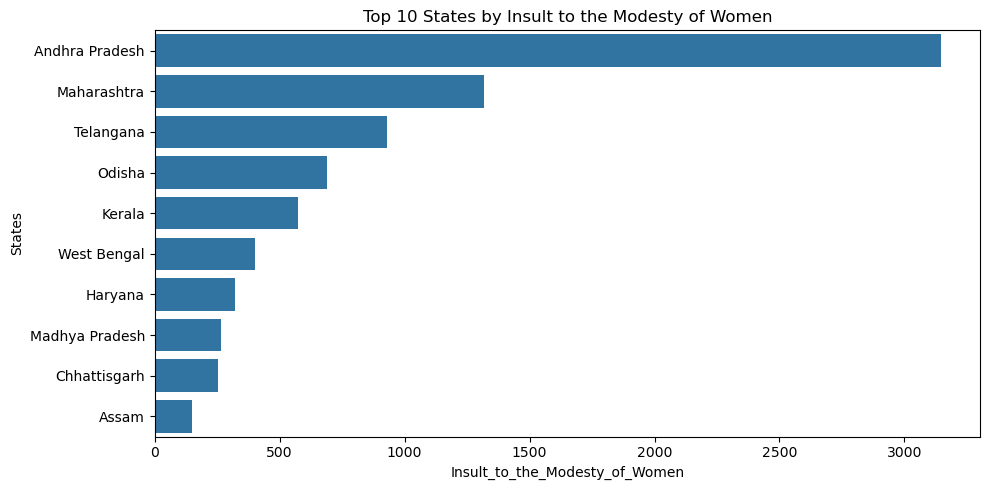

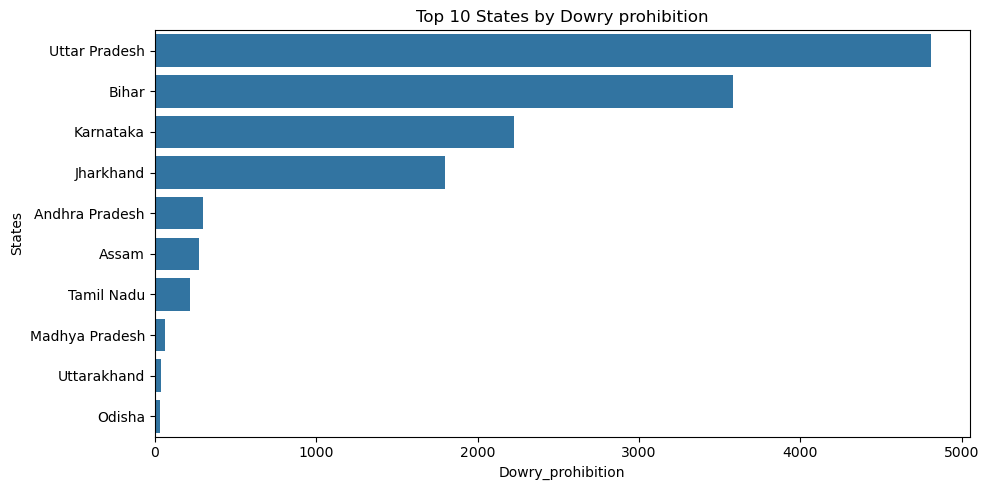

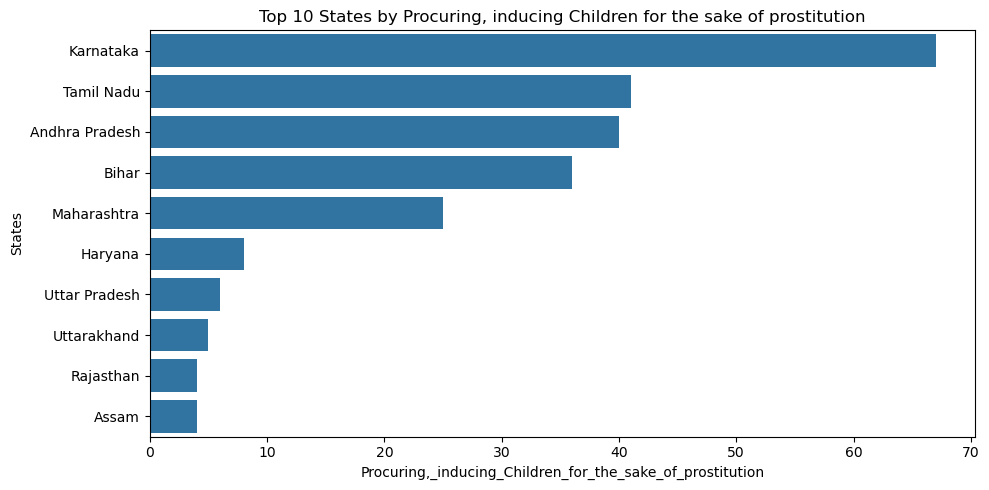

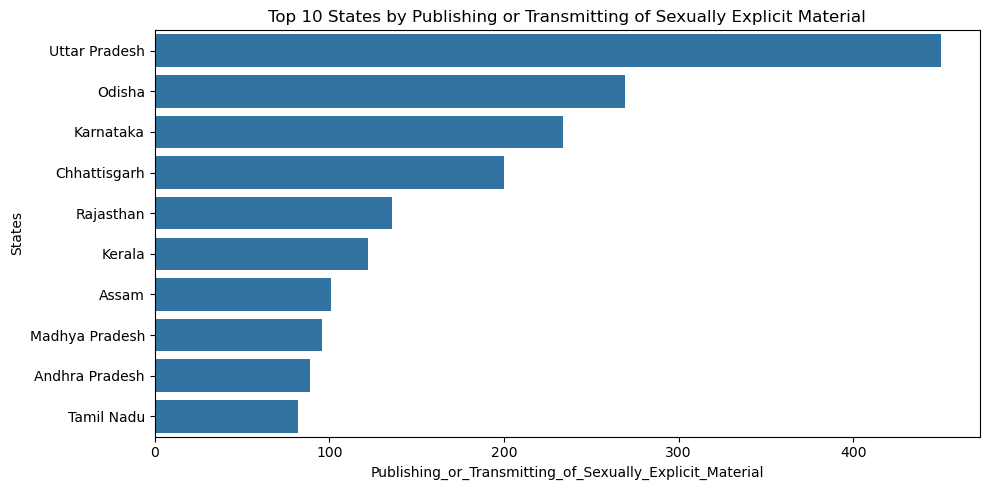

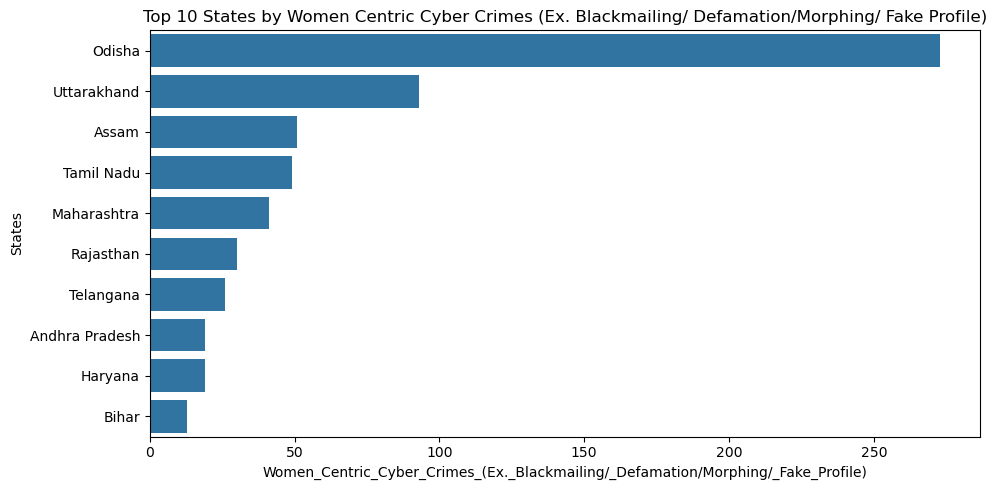

In [29]:
crime_columns = df_women.columns[1:]  # Exclude 'States'
for col in crime_columns:
    top10 = df_women.sort_values(by=col, ascending=False).head(10)
    plt.figure(figsize=(10, 5))
    sns.barplot(data=top10, y='States', x=col)
    plt.title(f"Top 10 States by {col.replace('_', ' ')}")
    plt.tight_layout()
    plt.show()


## Stacked Bar Plot (Crime Profile by State)

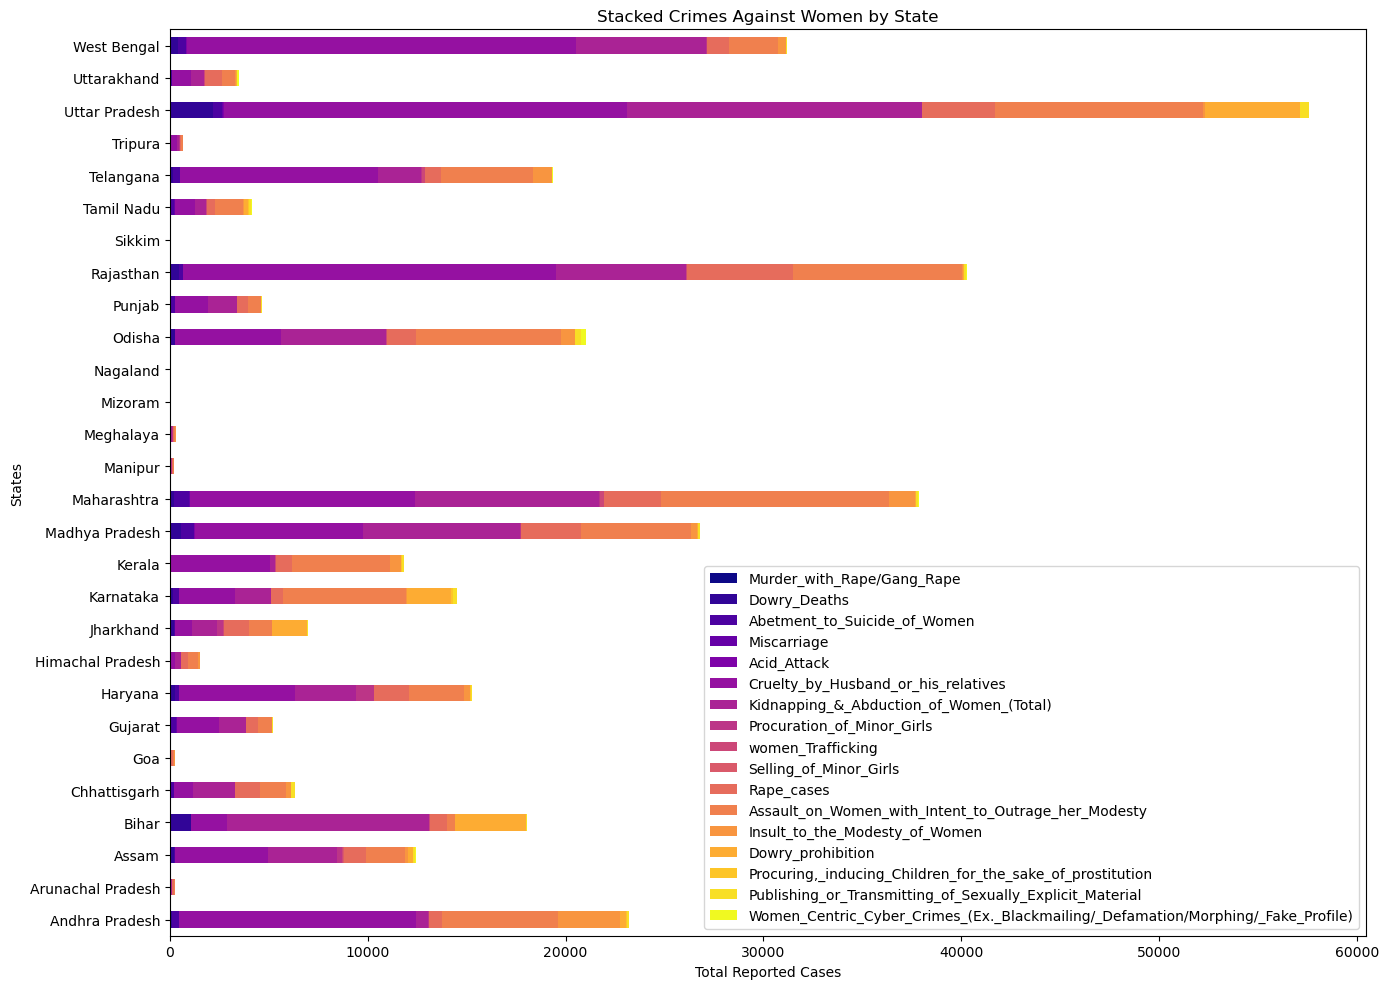

In [30]:
df_women.set_index('States')[crime_columns].plot(
    kind='barh', stacked=True, figsize=(14, 10), cmap='plasma'
)
plt.title("Stacked Crimes Against Women by State")
plt.xlabel("Total Reported Cases")
plt.tight_layout()
plt.show()


##  Rank States by Total Crimes

In [31]:
df_women['Total_Crimes'] = df_women.drop('States', axis=1).sum(axis=1)
df_ranked = df_women.sort_values(by='Total_Crimes', ascending=False)


C:\Users\priya\AppData\Local\Temp\ipykernel_18456\3952065963.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_ranked, x='Total_Crimes', y='States', palette='Reds_r')


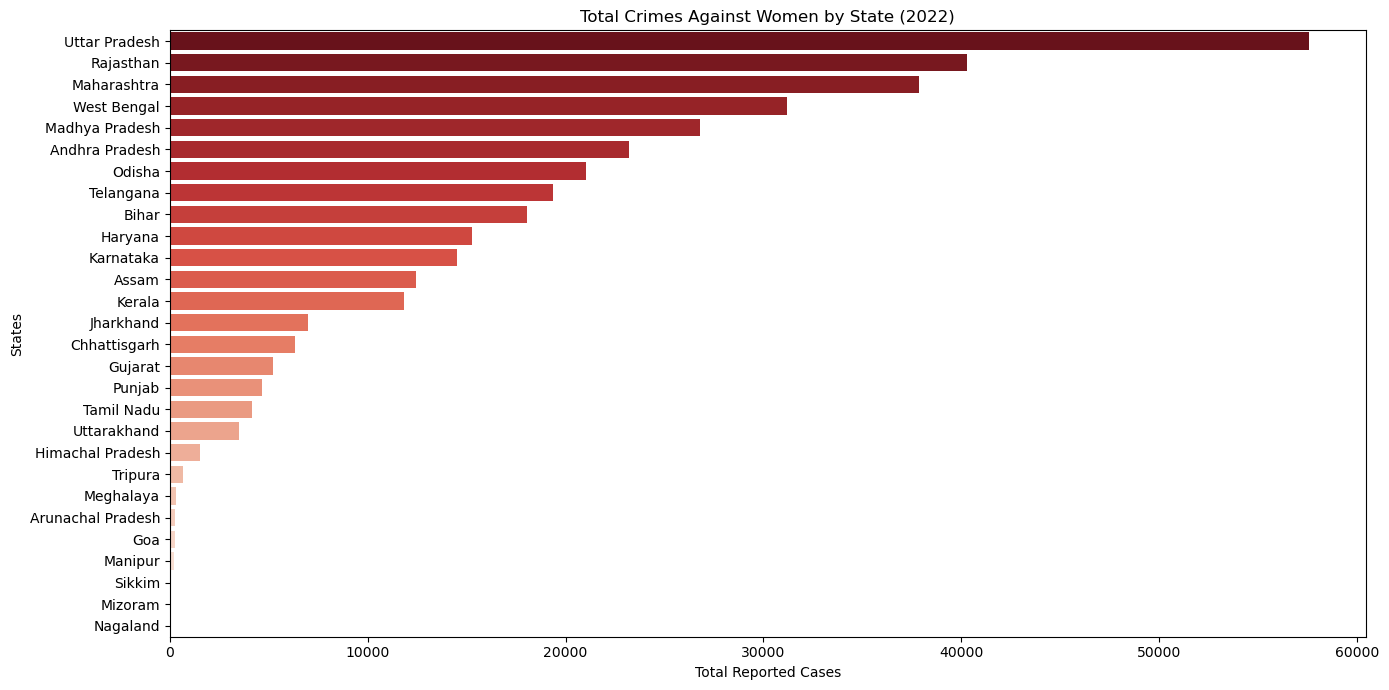

In [32]:
plt.figure(figsize=(14, 7))
sns.barplot(data=df_ranked, x='Total_Crimes', y='States', palette='Reds_r')
plt.title("Total Crimes Against Women by State (2022)")
plt.xlabel("Total Reported Cases")
plt.ylabel("States")
plt.tight_layout()
plt.show()


In [44]:
sex_ratio = {
    'Nagaland': 1068,
    'Arunachal Pradesh': 1036,
    'Meghalaya': 972,
    'Kerala': 971,
    'Chhattisgarh': 965,
    'Tripura': 960,
    'Mizoram': 959,
    'Karnataka': 947,
    'Uttar Pradesh': 945,
    'West Bengal': 944,
    'Goa': 943,
    'Tamil Nadu': 940,
    'Andhra Pradesh': 938,
    'Odisha': 937,
    'Himachal Pradesh': 936,
    'Delhi': 935,
    'Assam': 933,
    'Rajasthan': 933,
    'Uttarakhand': 933,
    'Jharkhand': 925,
    'Punjab': 923,
    'Manipur': 922,
    'Madhya Pradesh': 921,
    'Haryana': 916,
    'Gujarat': 908,
    'Telangana': 907,
    'Maharashtra': 906,
    'Bihar': 891
}


In [45]:
df_women['Women_sex_ratio'] = df_women['States'].map(sex_ratio)


In [46]:
# State-wise total population in Crores (2022 estimated)
population_crore = {
    'Uttar Pradesh': 24.1,
    'Maharashtra': 12.6,
    'Bihar': 12.7,
    'West Bengal': 10.2,
    'Madhya Pradesh': 8.8,
    'Rajasthan': 8.2,
    'Tamil Nadu': 7.9,
    'Karnataka': 7.1,
    'Gujarat': 7.3,
    'Andhra Pradesh': 5.3,
    'Odisha': 4.7,
    'Telangana': 4.3,
    'Kerala': 3.5,
    'Jharkhand': 4.0,
    'Assam': 3.6,
    'Punjab': 3.1,
    'Chhattisgarh': 3.0,
    'Haryana': 2.9,
    'Delhi': 2.1,
    'Jammu & Kashmir': 1.5,
    'Uttarakhand': 1.2,
    'Himachal Pradesh': 0.8,
    'Tripura': 0.45,
    'Meghalaya': 0.42,
    'Manipur': 0.38,
    'Nagaland': 0.24,
    'Goa': 0.18,
    'Arunachal Pradesh': 0.17,
    'Mizoram': 0.13,
    'Sikkim': 0.07
}


In [47]:
df_women['Total_Population']=df_women['States'].map(population_crore)

In [48]:
# Calculate estimated female population
df_women['Estimated_Female_Pop'] = df_women.apply(
    lambda row: (row['Women_sex_ratio'] * row['Total_Population']/ (row['Women_sex_ratio'] + 1000)) ,
    axis=1
)


In [49]:
df_women[['States','Total_Crimes','Total_Population','Estimated_Female_Pop']]

,States,Total_Crimes,Total_Population,Estimated_Female_Pop
0,Andhra Pradesh,23212,5.30,2.565222
1,Arunachal Pradesh,285,0.17,0.086503
2,Assam,12456,3.60,1.737610
3,Bihar,18043,12.70,5.983977
4,Chhattisgarh,6328,3.00,1.473282
5,Goa,273,0.18,0.087360
6,Gujarat,5227,7.30,3.474004
7,Haryana,15288,2.90,1.386430
8,Himachal Pradesh,1537,0.80,0.386777
9,Jharkhand,6968,4.00,1.922078


In [50]:

df_women['Crimes_Per_Lakh_Women'] = df_women['Total_Crimes'] /(df_women['Estimated_Female_Pop']*100)



In [51]:
df_women[['States','Crimes_Per_Lakh_Women'] ]

,States,Crimes_Per_Lakh_Women
0,Andhra Pradesh,90.487299
1,Arunachal Pradesh,32.946854
2,Assam,71.684673
3,Bihar,30.152189
4,Chhattisgarh,42.951710
5,Goa,31.250088
6,Gujarat,15.046038
7,Haryana,110.268815
8,Himachal Pradesh,39.738675
9,Jharkhand,36.252432


In [52]:
df_ranked = df_women.sort_values('Crimes_Per_Lakh_Women', ascending=False)


In [53]:
df_ranked['States']

7               Haryana
20            Rajasthan
23            Telangana
18               Odisha
0        Andhra Pradesh
2                 Assam
11               Kerala
12       Madhya Pradesh
13          Maharashtra
27          West Bengal
26          Uttarakhand
25        Uttar Pradesh
4          Chhattisgarh
10            Karnataka
8      Himachal Pradesh
9             Jharkhand
1     Arunachal Pradesh
19               Punjab
5                   Goa
3                 Bihar
24              Tripura
15            Meghalaya
6               Gujarat
14              Manipur
22           Tamil Nadu
16              Mizoram
17             Nagaland
21               Sikkim
Name: States, dtype: object

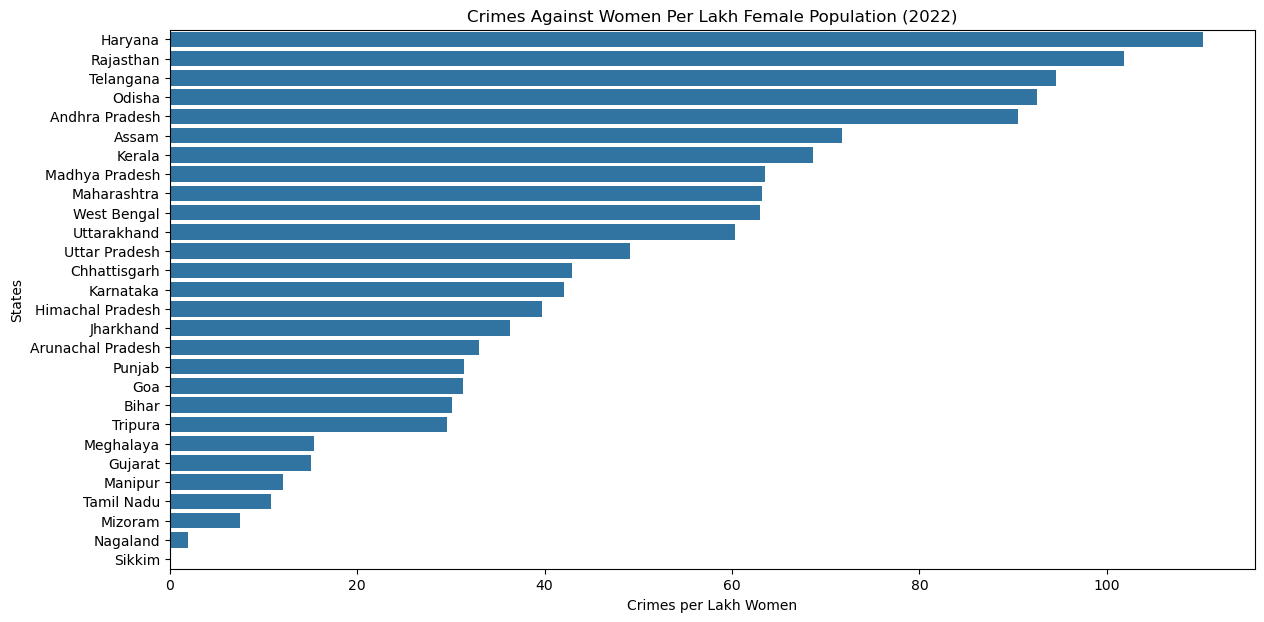

In [54]:
plt.figure(figsize=(14, 7))
sns.barplot(data=df_ranked, y='States',x='Crimes_Per_Lakh_Women')
plt.title("Crimes Against Women Per Lakh Female Population (2022)")
plt.xlabel("Crimes per Lakh Women")
plt.ylabel("States")
plt.show()


In [56]:
df_women.columns

Index(['States', 'Murder_with_Rape/Gang_Rape', 'Dowry_Deaths',
       'Abetment_to_Suicide_of_Women', 'Miscarriage', 'Acid_Attack',
       'Cruelty_by_Husband_or_his_relatives',
       'Kidnapping_&_Abduction_of_Women_(Total)', 'Procuration_of_Minor_Girls',
       'women_Trafficking', 'Selling_of_Minor_Girls', 'Rape_cases',
       'Assault_on_Women_with_Intent_to_Outrage_her_Modesty',
       'Insult_to_the_Modesty_of_Women', 'Dowry_prohibition',
       'Procuring,_inducing_Children_for_the_sake_of_prostitution',
       'Publishing_or_Transmitting_of_Sexually_Explicit_Material',
       'Women_Centric_Cyber_Crimes_(Ex._Blackmailing/_Defamation/Morphing/_Fake_Profile)',
       'Total_Crimes', 'Total_Population', 'Women_sex_ratio',
       'Estimated_Female_Pop', 'Crimes_Per_Lakh_Women'],
      dtype='object')

## Save the file

In [57]:
df1.to_csv('df1.csv', index=False)
df2.to_csv('df2.csv', index=False)
df_women.to_csv('df_women.csv', index=False)
